## Problem Statement

This project aims to understand the prevalence of standardized test taking to California high school students. Some questions I'd like to consider are 
* Which schools have the highest testing rates?
* Do schools where more students take standardized tests also score better on those tests?
* Do different tests (ACT, SAT, potentially AP) have different patterns?
* How did testing prevalence / scores change in California during COVID?

### Contents

## Background

The ACT and SAT are two of the most widespread standardized college admission tests used in the United States. 
In 2019 more than 2.2 million students took the SAT ([Source](https://reports.collegeboard.org/pdf/2019-total-group-sat-suite-assessments-annual-report.pdf#page=3&zoom=100,-142,731)).
The ACT is ran by the nonprofit organization [ACT](https://www.act.org/content/act/en/about-act.html) of the same name while the SAT is ran by the [College Board](https://www.collegeboard.org/).

While many colleges and universities have previously required prospective applicants to take either the ACT or SAT this is rapidly changing during the era of COVID-19. 
Nevertheless, several top colleges still require or encourage these exams and they are recommended for many students ([Source 1](https://www.cbsnews.com/news/act-and-sat-no-longer-required-college-admissions/), [Source 2](https://supertutortv.com/college/where-sat-is-required-what-colleges-are-and-arent-test-optional-for-the-class-of-2022/)).
As a result the number of high school students taking the SAT dropped from 2.2 million in the class of 2019 to 1.5 million in the class of 2021 ([2019](https://reports.collegeboard.org/pdf/2019-total-group-sat-suite-assessments-annual-report.pdf#page=3&zoom=100,-142,731), [2021](https://reports.collegeboard.org/pdf/2021-total-group-sat-suite-assessments-annual-report.pdf)).

The SAT has 2 sections: Math, Evidence-Based Reading and Writing (ERW). 
The Math and ERW sections are graded on a scale of 200-800.
The total score is the sum of the scores on the Math and ERW sections ([Source](https://collegereadiness.collegeboard.org/sat/scores/understanding-scores/interpreting)). 
Additionally the college board sets benchmark scores designed to assess college readiness ([Source](https://collegereadiness.collegeboard.org/about/scores/benchmarks)).

The ACT has 4 sections: Math, English, Science, and Reading.
Each section is scored from 1-36 with a national average of about 21.
The composite score is the average of the four subject scores ([Source](https://www.princetonreview.com/college-advice/good-act-scores)).

Additionally both the SAT and ACT have a separate essay or writing test that is optional for a student to take with the rest of the exam.

### Datasets Used

For this project we use data on public California high schools published by the California Department of Education. 
On their [website](https://www.cde.ca.gov/ds/sp/ai/) they provide information on all public highschools in California whose students participated in the ACT, SAT, and AP (Advanced Placement) exams from the 2016-17 school year through the 2019-20 school year.
Private high schools and home schooled students are not included in the data set.

For the SAT, the data includes the number of students at the school, the number of students who took the SAT and the percentage of students meeting college readiness benchmarks.
For the ACT, the data includes similar information about the school, the number of students who took the ACT, the average on each section, and the percentage of students scoring at or above 21. 
Full data dictionaries are available on the CDE website at https://www.cde.ca.gov/ds/sp/ai/.

For both datasets the statistics are also rolled up to the district, county, and state level.

### Outside Research

In this project, I spend some time looking at the testing performance of charter schools specifically.
A lot of research exists on standardized testing at charter schools.

The most common metric used to judge charter school success is their standardized test results and some research found improvements in charter schools, eg [(Winters)](https://eric.ed.gov/?id=ED604330).

Additionally, some research finds that charter schools have a benefical spillover effect on public schools in the area due to positive competition, for example [(Gilraine, Petronijevic, and Singleton)](https://edworkingpapers.org/sites/default/files/GPS_120919.pdf), although this is contested. 

In [1]:
# Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [2]:
values = [17, 0, -5, 22]

In [3]:
# Code:
def mean(values):
    return sum(values)/len(values)

mean(values)

8.5

2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [4]:
# Code:
def std(values):
    mu = mean(values)
    variance = sum((x - mu)**2 for x in values)/len(values)
    return variance**(1/2)

std(values)    

11.280514172678478

3. Data cleaning function:
    
    Write a function that takes in a string that is a number and a percent symbol (ex. '50%', '30.5%', etc.) and converts this to a float that is the decimal approximation of the percent. For example, inputting '50%' in your function should return 0.5, '30.5%' should return 0.305, etc. Make sure to test your function to make sure it works!

You will use these functions later on in the project!

In [5]:
# Code:
def convert_pct(pct):
    return float(pct[:-1])/100

print(convert_pct('50%'))
print(convert_pct('30.5%'))

0.5
0.305


In [6]:
# Formatting options
pd.set_option('display.precision', 3)
sns.set_style("whitegrid")

## Cali - ACTs

### View Dataset

In [7]:
act_raw = pd.read_csv('data/act_2019_ca.csv')

The ACT data contains 18 columns and 2310 rows. 
Each column has at most 2309 non-null values because the last row is all nulls (we drop this in the data cleaning section).
Since the data is rolled up to the district, county, and state level, some of the larger entities do not have an SName/SCode (school name / code) or DName/DCode (district name / code).
Additionally 56 additional nulls are in the average score and number / percent of students scoring above 21 columns.
These correspond to schools, districts, and counties where 0 students took the ACT.

In [8]:
act_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2310 entries, 0 to 2309
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CDS          2309 non-null   float64
 1   CCode        2309 non-null   float64
 2   CDCode       2309 non-null   float64
 3   SCode        1787 non-null   float64
 4   RType        2309 non-null   object 
 5   SName        1729 non-null   object 
 6   DName        2251 non-null   object 
 7   CName        2309 non-null   object 
 8   Enroll12     2309 non-null   float64
 9   NumTstTakr   2309 non-null   float64
 10  AvgScrRead   1953 non-null   object 
 11  AvgScrEng    1953 non-null   object 
 12  AvgScrMath   1953 non-null   object 
 13  AvgScrSci    1953 non-null   object 
 14  NumGE21      1953 non-null   object 
 15  PctGE21      1953 non-null   object 
 16  Year         2309 non-null   object 
 17  Unnamed: 17  0 non-null      float64
dtypes: float64(7), object(11)
memory usage: 325.0+ K

In [9]:
act_raw.head()

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTstTakr,AvgScrRead,AvgScrEng,AvgScrMath,AvgScrSci,NumGE21,PctGE21,Year,Unnamed: 17
0,3.367e+13,33.0,3.367e+06,1.299e+05,S,21st Century Learning Institute,Beaumont Unified,Riverside,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
1,1.964e+13,19.0,1.964e+06,1.996e+06,S,ABC Secondary (Alternative),ABC Unified,Los Angeles,58.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
2,1.564e+13,15.0,1.564e+06,1.530e+06,S,Abraham Lincoln Alternative,Southern Kern Unified,Kern,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
3,4.370e+13,43.0,4.370e+06,4.334e+06,S,Abraham Lincoln High,San Jose Unified,Santa Clara,463.0,53.0,23,22,22,23,34,64.15,2018-19,NaN
4,1.965e+13,19.0,1.965e+06,1.935e+06,S,Abraham Lincoln Senior High,Los Angeles Unified,Los Angeles,226.0,19.0,21,20,23,22,11,57.89,2018-19,NaN


### Data Cleaning

In [10]:
act_ca = act_raw.drop(columns='Unnamed: 17') # This column is all NA

In [11]:
# Last row is empty
print(act_ca.iloc[2309])
act_ca.drop(index = 2309, inplace = True)

CDS           NaN
CCode         NaN
CDCode        NaN
SCode         NaN
RType         NaN
SName         NaN
DName         NaN
CName         NaN
Enroll12      NaN
NumTstTakr    NaN
AvgScrRead    NaN
AvgScrEng     NaN
AvgScrMath    NaN
AvgScrSci     NaN
NumGE21       NaN
PctGE21       NaN
Year          NaN
Name: 2309, dtype: object


The data is rolled up on the levels of school (S), school district (D), county (C), and statewide (X).

In [12]:
act_ca['RType'].value_counts()

S    1728
D     522
C      58
X       1
Name: RType, dtype: int64

#### Drop unused columns
For our analysis we won't use the codes (except CDS for identification) or any of the 4 subject scores. 
We can use CDS as an index since it is unique for each entity.

In [13]:
act_ca.columns

Index(['CDS', 'CCode', 'CDCode', 'SCode', 'RType', 'SName', 'DName', 'CName',
       'Enroll12', 'NumTstTakr', 'AvgScrRead', 'AvgScrEng', 'AvgScrMath',
       'AvgScrSci', 'NumGE21', 'PctGE21', 'Year'],
      dtype='object')

In [14]:
name_cols = ['SName', 'DName', 'CName']

code_cols = ['CCode', 'CDCode', 'SCode']
subject_cols = ['AvgScrRead', 'AvgScrEng', 'AvgScrMath', 'AvgScrSci']
dropped_cols = code_cols + ['Year']
act_ca.drop(columns=dropped_cols, inplace = True)

In [15]:
act_ca.set_index('CDS', inplace=True)

#### School Size

If a school has fewer than 15 test takers then their average score and number / percentage of students above 21 aren't included in the data to protect anonymity. We'll drop these datasets.

**TODO** - possibly delete this ??
Additionally we'll split the remaining schools off with fewer than 100 students so that the small schools in our sample are not biased towards those that take a lot of tests. There are 1306 entities remaining.

In [16]:
act_big = act_ca.query('NumTstTakr >= 15').copy()
act_small = act_big.query('Enroll12 >= 100')

In [17]:
act_big.head()

,RType,SName,DName,CName,Enroll12,NumTstTakr,AvgScrRead,AvgScrEng,AvgScrMath,AvgScrSci,NumGE21,PctGE21
CDS,,,,,,,,,,,,
4.370e+13,S,Abraham Lincoln High,San Jose Unified,Santa Clara,463.0,53.0,23,22,22,23,34,64.15
1.965e+13,S,Abraham Lincoln Senior High,Los Angeles Unified,Los Angeles,226.0,19.0,21,20,23,22,11,57.89
1.977e+13,S,Academia Avance Charter,SBE - Academia Avance Charter,Los Angeles,65.0,33.0,15,15,17,16,3,9.09
1.965e+13,S,Academies of Education and Empowerment at Cars...,Los Angeles Unified,Los Angeles,126.0,16.0,18,18,18,17,5,31.25
1.965e+13,S,Academy of the Canyons,William S. Hart Union High,Los Angeles,104.0,36.0,29,29,25,25,34,94.44


#### School, District, County counts

After removing entities with too few students we are left with 1016 out of the 1728 schools (59%), 350 out of the 522 districts (67%), and 54 out of the 58 districts (93%). 

In [18]:
act_big['RType'].value_counts()

S    1016
D     350
C      54
X       1
Name: RType, dtype: int64

#### Fix data types

In [19]:
act_big.dtypes

RType          object
SName          object
DName          object
CName          object
Enroll12      float64
NumTstTakr    float64
AvgScrRead     object
AvgScrEng      object
AvgScrMath     object
AvgScrSci      object
NumGE21        object
PctGE21        object
dtype: object

* Make Enroll12 and NumTstTakr ints
* Make NumGE21 int
* Make PctGE21 a float

In [20]:
act_big['Enroll12'] = act_big['Enroll12'].astype(int)
act_big['NumTstTakr'] = act_big['NumTstTakr'].astype(int)

In [21]:
act_big['NumGE21'] = act_big['NumGE21'].astype(int)
act_big['PctGE21'] = act_big['PctGE21'].astype(float)

In [22]:
act_big.loc[:,'AvgScrRead':'AvgScrSci'] = act_big.loc[:,'AvgScrRead':'AvgScrSci'].astype(float)

#### High testing rates

Some schools have more test takers than students. 
For example, [PUC Nueva Esperanza Charter Academy](https://www.pucschools.org/neca/) is a charter middle school with zero high school students, yet 22 students who took the ACT exam listed it as their school.
This could be due to homeschooling or students attending other schools that don't proctor the exam taking the exam at a larger schools. 
For further information, see the notes on the ([ACT data dictionary](cde.ca.gov/ds/sp/ai/glossaryact2018.asp)) from the CDE.
Overall of these schools and districts,
* Most are charter schools including 12 [alliance charter schools](https://www.laalliance.org/) in LA and 9 [Aspire charter schools](https://aspirepublicschools.org/discover_aspire/) throughout California.
* Most schools are in cities / urban areas - exception Los Molinos High

For my purposes to capture the significance of testing to a school I will allow the percent to go above 100 but to handle outliers I limit it at 125%. 

In [23]:
act_big.drop(columns = subject_cols).query('Enroll12 < NumTstTakr')

,RType,SName,DName,CName,Enroll12,NumTstTakr,NumGE21,PctGE21
CDS,,,,,,,,
1.965e+13,S,Alliance Alice M. Baxter College-Ready High,Los Angeles Unified,Los Angeles,61,77,12,15.58
1.965e+13,S,Alliance Cindy and Bill Simon Technology Acade...,Los Angeles Unified,Los Angeles,123,155,13,8.39
1.965e+13,S,Alliance Judy Ivie Burton Technology Academy High,Los Angeles Unified,Los Angeles,138,162,24,14.81
1.965e+13,S,Alliance Leichtman-Levine Family Foundation En...,Los Angeles Unified,Los Angeles,128,155,40,25.81
1.965e+13,S,Alliance Marc & Eva Stern Math and Science,Los Angeles Unified,Los Angeles,141,157,48,30.57
1.965e+13,S,Alliance Margaret M. Bloomfield Technology Aca...,Los Angeles Unified,Los Angeles,114,139,19,13.67
1.965e+13,S,Alliance Morgan McKinzie High,Los Angeles Unified,Los Angeles,73,86,7,8.14
1.965e+13,S,Alliance Ouchi-O'Donovan 6-12 Complex,Los Angeles Unified,Los Angeles,130,148,16,10.81
1.965e+13,S,Alliance Patti And Peter Neuwirth Leadership A...,Los Angeles Unified,Los Angeles,131,164,18,10.98


### Features to measure test performance and participation

Since our goal is to track test performance and particpation we need a metric for each of these.
For our purposes, we can measure them as follows: 
* Perfomance by the percentage of test takers with a composite score at least 21
* Alternatively, performance by the average composite score
* Participation by the percentage of enrollees who take the test

In [24]:
act_big['ACT_taken_pct'] = 100*act_big['NumTstTakr']/act_big['Enroll12']

Since the two performance metrics are highly correlated it shouldn't affect the analysis too much which one is used.

<AxesSubplot:xlabel='PctGE21', ylabel='AvgScrComp'>

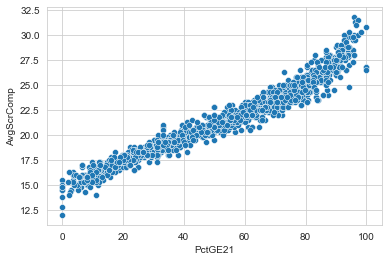

In [25]:
act_big['AvgScrComp'] = (act_big.loc[:,'AvgScrRead':'AvgScrSci'].sum(axis = 1))/4
act_big.drop(columns = subject_cols, inplace=True)
sns.scatterplot(data = act_big, x = 'PctGE21', y = 'AvgScrComp')

In [26]:
act_big['ACT_taken_pct'] = act_big['ACT_taken_pct'].clip(upper = 125).round(2)

### Data Dictionary

In [27]:
act_big.head(1)

,RType,SName,DName,CName,Enroll12,NumTstTakr,NumGE21,PctGE21,ACT_taken_pct,AvgScrComp
CDS,,,,,,,,,,
4.370e+13,S,Abraham Lincoln High,San Jose Unified,Santa Clara,463,53,34,64.15,11.45,22.5


All features are based off of the ACT dataset published by the CDE.

|Feature|Type|Description|
|---|---|---|
|**CDS**|*integer*|The code identifying the school, district, or county. Consists of the concatentation of the County, District, and school codes.| 
|**RType**|*string*|The type of entity. 'S' stands for school, 'D' for district, 'C' for county, and 'X' for state|
|**SName**|*string*|The name of the school|
|**DName**|*string*|The name of the district|
|**CName**|*string*|The name of the county|
|**Enroll12**|*int*|The number of enrolled 12th grade students|
|**NumTstTakr**|*int*|The number of 12th graders who have taken the ACT before graduating high school|
|**NumGE21**|*int*|Number of students who scored at least 21 on their ACT composite score|
|**PctGE21**|*int*|Percent of students who scored at least 21 on their ACT composite score|
|**AvgScrComp**|*float*|Approximate average composite score of all students|
|**ACT_taken_pct**|*float*|Percentage of students who took the ACT|

### Exploratory Data Analysis

#### Statewide aggregates

Statewide California had almost 500,000 12th grade students and about 1 out of 6 took the ACT. Of the test takers, 55% scored at least 21.

In [28]:
act_big.query("RType == 'X'").drop(columns = name_cols)

,RType,Enroll12,NumTstTakr,NumGE21,PctGE21,ACT_taken_pct,AvgScrComp
CDS,,,,,,,
0.0,X,489650,82668,45466,55.0,16.88,22.0


#### Summary Statistics

Among schools, the inter quartile range of 12th grade enrollment is 173-524.
The inter quartile range of the percentage of students taking tests is 12% - 31% with outliers going past 100% as discussed earlier.

In [29]:
act_big.query('RType == "S"').describe()

,Enroll12,NumTstTakr,NumGE21,PctGE21,ACT_taken_pct,AvgScrComp
count,1016.000,1016.000,1016.000,1016.000,1016.000,1016.000
mean,371.832,79.145,43.673,51.307,26.718,21.337
std,206.213,66.575,50.111,26.534,24.125,3.668
min,0.000,15.000,0.000,0.000,2.200,12.000
25%,173.000,33.000,12.000,28.570,11.912,18.250
50%,382.000,58.000,24.000,52.860,19.475,21.250
75%,524.000,105.000,55.000,74.700,30.983,24.000
max,1135.000,512.000,392.000,100.000,125.000,31.750


The average county has similar performance levels, though the range of ACT participation is lower and the range of performance is tighter.
The interquartile range of county enrollment is 700 to 8700 with a median of 2600.

In [30]:
act_big.query('RType == "C"').describe()

,Enroll12,NumTstTakr,NumGE21,PctGE21,ACT_taken_pct,AvgScrComp
count,54.000,54.000,54.000,54.000,54.000,54.000
mean,9057.426,1530.574,841.759,56.757,15.199,21.931
std,17830.613,3256.453,1675.300,17.189,9.598,2.279
min,87.000,15.000,8.000,20.000,4.070,16.750
25%,737.250,73.000,44.500,43.560,9.135,20.250
50%,2599.000,450.500,202.000,59.775,13.990,22.250
75%,8692.750,1283.250,671.250,71.373,18.925,24.125
max,114618.000,20678.000,9182.000,87.100,63.220,26.500


### 2. 
Use a **dictionary comprehension** to apply the standard deviation function you create in part 1 to each numeric column in the dataframe.  **No loops**.
    - Assign the output to variable `sd` as a dictionary where: 
        - Each column name is now a key 
        - That standard deviation of the column is the value 
        - *Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [31]:
sd = {col: std(act_big[col]) for col in act_big if act_big[col].dtype in ('int32', 'float64')}
sd

{'Enroll12': 13574.530723065709,
 'NumTstTakr': 2310.7833068275245,
 'NumGE21': 1260.9162708994336,
 'PctGE21': 25.571455952058198,
 'ACT_taken_pct': 22.290365438931794,
 'AvgScrComp': 3.5291776762264955}

#### Feature histograms

In [32]:
def act_hist(feature, title, xlab, ylab = "Count"):
    sns.histplot(data = act_big, x = feature)
    plt.title(title, fontsize = 17)
    plt.xlabel(xlab, fontsize = 13)
    plt.ylabel(ylab, fontsize = 13)
    plt.show()

Comparing the distributions of the two performance metrics we see that the average composite score is normally distributed while the percentage of students scoring at least 21 is more bimodally distributed and is skewed to the left.

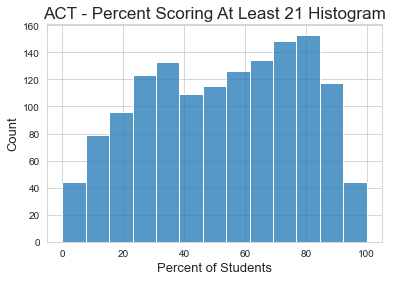

In [33]:
act_hist("PctGE21", "ACT - Percent Scoring At Least 21 Histogram", "Percent of Students")

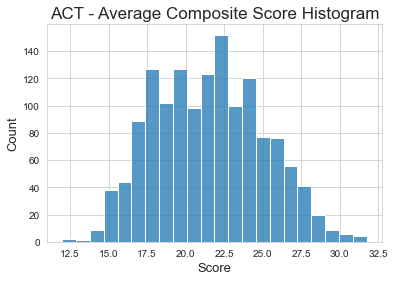

In [34]:
act_hist("AvgScrComp", "ACT - Average Composite Score Histogram", "Score")

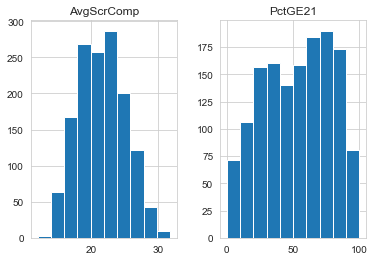

In [35]:
# A side-by-side histogram
act_big[['AvgScrComp', 'PctGE21']].hist()
plt.show()

The histogram of participation rates has a very long tail to the right of schools and entities with high rates.

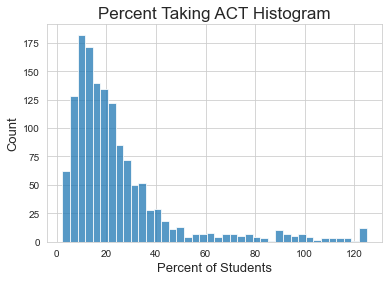

In [36]:
act_hist("ACT_taken_pct", "Percent Taking ACT Histogram", "Percent of Students")

### Comparing schools ACT testing rates and performance

#### Which schools / counties have the highest testing rates?

The top 20 schools with the highest testing rates are all charter schools.

In [37]:
act_top_pct_schools = act_big.query('RType == "S"').drop(columns='RType').\
    sort_values('ACT_taken_pct', ascending = False).head(20)

act_top_pct_schools

,SName,DName,CName,Enroll12,NumTstTakr,NumGE21,PctGE21,ACT_taken_pct,AvgScrComp
CDS,,,,,,,,,
1.613e+12,Aspire Golden State College Preparatory Academy,Oakland Unified,Alameda,65,151,31,20.53,125.00,17.25
5.071e+13,Aspire Vanguard College Preparatory Academy,Modesto City High,Stanislaus,18,23,8,34.78,125.00,18.00
1.965e+13,Alliance Ted K. Tajima High,Los Angeles Unified,Los Angeles,59,110,24,21.82,125.00,17.00
1.965e+13,Alliance Piera Barbaglia Shaheen Health Servic...,Los Angeles Unified,Los Angeles,105,143,4,2.80,125.00,14.50
1.965e+13,Alliance Patti And Peter Neuwirth Leadership A...,Los Angeles Unified,Los Angeles,131,164,18,10.98,125.00,15.75
1.965e+13,PUC Nueva Esperanza Charter Academy,Los Angeles Unified,Los Angeles,0,22,1,4.55,125.00,16.00
1.965e+13,Alliance Cindy and Bill Simon Technology Acade...,Los Angeles Unified,Los Angeles,123,155,13,8.39,125.00,15.25
1.965e+13,Alliance Alice M. Baxter College-Ready High,Los Angeles Unified,Los Angeles,61,77,12,15.58,125.00,17.00
4.169e+13,Aspire East Palo Alto Charter,Ravenswood City Elementary,San Mateo,20,31,3,9.68,125.00,15.75


Excluding schools at or above 100% testing rates still leaves a list of primarily - but not all - charter schools.

In [38]:
act_big.query('RType == "S" and ACT_taken_pct < 100').drop(columns='RType').\
    sort_values('ACT_taken_pct', ascending = False).head(20) #['PctGE21'].mean()

,SName,DName,CName,Enroll12,NumTstTakr,NumGE21,PctGE21,ACT_taken_pct,AvgScrComp
CDS,,,,,,,,,
7.618e+12,Leadership Public Schools: Richmond,West Contra Costa Unified,Contra Costa,149,148,18,12.16,99.33,16.25
1.973e+13,Compton Early College High,Compton Unified,Los Angeles,65,64,22,34.38,98.46,19.00
1.510e+13,Wonderful College Prep Academy,Kern County Office of Education,Kern,128,126,35,27.78,98.44,18.00
3.475e+13,Inderkum High,Natomas Unified,Sacramento,471,463,110,23.76,98.30,17.25
3.768e+13,Preuss School UCSD,San Diego Unified,San Diego,103,100,48,48.00,97.09,20.25
1.612e+12,Leadership Public Schools - Hayward,Hayward Unified,Alameda,140,134,39,29.10,95.71,18.75
1.965e+13,Math and Science College Preparatory,Los Angeles Unified,Los Angeles,155,148,28,18.92,95.48,16.75
3.467e+13,Sacramento Charter High,Sacramento City Unified,Sacramento,151,144,25,17.36,95.36,16.75
3.868e+13,KIPP San Francisco College Preparatory,San Francisco Unified,San Francisco,53,50,20,40.00,94.34,19.25


The counties with the highest taking rates are largely in northern California (Modoc, Tehama, Siskiyou) and the bay area (Marin, San Francisco, Contra Costa, and Alameda) regions.

In [39]:
act_big.query('RType == "C"').drop(columns= ['SName', 'DName']).\
    sort_values('ACT_taken_pct', ascending = False).head(10)

,RType,CName,Enroll12,NumTstTakr,NumGE21,PctGE21,ACT_taken_pct,AvgScrComp
CDS,,,,,,,,
2.500e+13,C,Modoc,87,55,11,20.00,63.22,16.75
5.200e+13,C,Tehama,688,302,105,34.77,43.90,18.75
2.100e+13,C,Marin,2647,753,606,80.48,28.45,25.75
3.800e+13,C,San Francisco,4447,1078,565,52.41,24.24,21.50
7.000e+12,C,Contra Costa,14593,3183,2250,70.69,21.81,24.50
3.100e+13,C,Placer,5931,1292,993,76.86,21.78,24.25
9.000e+12,C,El Dorado,2226,465,358,76.99,20.89,24.50
1.000e+12,C,Alameda,17567,3630,2459,67.74,20.66,24.25
3.000e+13,C,Orange,41235,8501,6087,71.60,20.62,24.25


#### Which schools / counties have the lowest testing rates?

Note this metric is biased towards large schools as schools with fewer than 15 test takers are excluded from the data outright.

In [40]:
act_low_pct_schools = act_big.query('RType == "S"').drop(columns='RType').\
    sort_values('ACT_taken_pct').head(20)

act_low_pct_schools.head()

,SName,DName,CName,Enroll12,NumTstTakr,NumGE21,PctGE21,ACT_taken_pct,AvgScrComp
CDS,,,,,,,,,
5.673e+13,Pacifica High,Oxnard Union High,Ventura,726,16,8,50.00,2.20,21.00
3.066e+13,Katella High,Anaheim Union High,Orange,651,18,7,38.89,2.76,19.00
3.367e+13,Hemet High,Hemet Unified,Riverside,573,18,13,72.22,3.14,22.00
1.564e+13,Foothill High,Kern High,Kern,471,15,6,40.00,3.18,19.50
3.668e+13,Bloomington High,Colton Joint Unified,San Bernardino,481,17,11,64.71,3.53,20.75


The counties with the lowest testing rates include many counties in the northern California (Nevada, Yuba, Mendocino, Colusa, Humboldt, and Shasa) and High Sierra (Mono and Inyo) regions.

In [41]:
act_big.query('RType == "C"').drop(columns= ['SName', 'DName']).\
    sort_values('ACT_taken_pct').head(10)

,RType,CName,Enroll12,NumTstTakr,NumGE21,PctGE21,ACT_taken_pct,AvgScrComp
CDS,,,,,,,,
2.900e+13,C,Nevada,1869,76,57,75.00,4.07,24.25
5.500e+13,C,Tuolumne,518,23,18,78.26,4.44,23.75
2.600e+13,C,Mono,420,20,16,80.00,4.76,24.50
1.400e+13,C,Inyo,548,28,19,67.86,5.11,22.25
5.800e+13,C,Yuba,977,64,30,46.88,6.55,20.00
5.000e+12,C,Calaveras,451,31,27,87.10,6.87,24.50
2.300e+13,C,Mendocino,988,68,44,64.71,6.88,23.00
6.000e+12,C,Colusa,339,26,9,34.62,7.67,19.00
1.200e+13,C,Humboldt,1342,107,79,73.83,7.97,24.25


#### Which schools / districts perform the best on the ACT?

Geographically, the top scoring ACT schools seem to be clustered around three of California's cities 
* The bay area including Santa Clara, Santa Cruz and Contra Costa counties (although no schools from San Francisco itself are on the list)
* Los Angeles including Orange and Ventura counties
* San Diego

The only school not in those regions is Amador High in Amador county.

In [42]:
act_top_score_schools = act_big.query('RType == "S"').drop(columns='RType').\
    sort_values(['PctGE21', 'NumTstTakr'], ascending=[False, False]).head(20)

act_top_score_schools

,SName,DName,CName,Enroll12,NumTstTakr,NumGE21,PctGE21,ACT_taken_pct,AvgScrComp
CDS,,,,,,,,,
3.066e+13,Oxford Academy,Anaheim Union High,Orange,200,56,56,100.00,28.00,30.75
5.673e+13,Santa Susana High,Simi Valley Unified,Ventura,252,26,26,100.00,10.32,26.50
3.768e+13,River Valley Charter,Lakeside Union Elementary,San Diego,50,15,15,100.00,30.00,26.75
1.964e+13,Whitney (Gretchen) High,ABC Unified,Los Angeles,165,55,54,98.18,33.33,30.25
1.613e+12,Piedmont High,Piedmont City Unified,Alameda,205,111,108,97.30,54.15,30.00
4.369e+13,Monta Vista High,Fremont Union High,Santa Clara,584,212,206,97.17,36.30,31.50
4.370e+13,Saratoga High,Los Gatos-Saratoga Joint Union High,Santa Clara,321,121,117,96.69,37.69,31.00
1.612e+12,Mission San Jose High,Fremont Unified,Alameda,490,157,151,96.18,32.04,31.25
4.369e+13,Lynbrook High,Fremont Union High,Santa Clara,415,172,165,95.93,41.45,31.75


However, the counties noted above do not perform as well overall - with the exception of Santa Clara, none are in the top 10 counties statewide.

In [43]:
act_big.query('RType == "C"').drop(columns= ['SName', 'DName']).\
    sort_values('PctGE21', ascending = False).head(10)

,RType,CName,Enroll12,NumTstTakr,NumGE21,PctGE21,ACT_taken_pct,AvgScrComp
CDS,,,,,,,,
5.000e+12,C,Calaveras,451,31,27,87.10,6.87,24.50
2.100e+13,C,Marin,2647,753,606,80.48,28.45,25.75
2.600e+13,C,Mono,420,20,16,80.00,4.76,24.50
3.000e+12,C,Amador,305,37,29,78.38,12.13,23.00
5.500e+13,C,Tuolumne,518,23,18,78.26,4.44,23.75
4.300e+13,C,Santa Clara,21656,4228,3300,78.05,19.52,26.50
9.000e+12,C,El Dorado,2226,465,358,76.99,20.89,24.50
3.100e+13,C,Placer,5931,1292,993,76.86,21.78,24.25
4.500e+13,C,Shasta,2161,173,131,75.72,8.01,24.50


#### Which schools / counties have the lowest ACT scores.

In fact, 10 of the lowest performing schools are located in LA county.

In [44]:
act_low_score_schools = act_big.query('RType == "S"').drop(columns='RType').\
    sort_values(['PctGE21', 'NumTstTakr'], ascending=[True, False]).head(20)

act_low_score_schools

,SName,DName,CName,Enroll12,NumTstTakr,NumGE21,PctGE21,ACT_taken_pct,AvgScrComp
CDS,,,,,,,,,
3.668e+13,Eric Birch High (Continuation),Fontana Unified,San Bernardino,142,113,0,0.00,79.58,12.75
3.668e+13,Citrus High (Continuation),Fontana Unified,San Bernardino,181,103,0,0.00,56.91,12.00
1.965e+13,APEX Academy,Los Angeles Unified,Los Angeles,82,30,0,0.00,36.59,14.50
1.965e+13,Augustus F. Hawkins High B Community Health Ad...,Los Angeles Unified,Los Angeles,93,25,0,0.00,26.88,14.50
1.965e+13,New Designs Charter School-Watts,Los Angeles Unified,Los Angeles,47,25,0,0.00,53.19,13.75
1.075e+13,Tranquillity High,Golden Plains Unified,Fresno,120,19,0,0.00,15.83,14.75
3.768e+13,King-Chavez Community High,San Diego Unified,San Diego,87,17,0,0.00,19.54,15.00
7.618e+12,John F. Kennedy High,West Contra Costa Unified,Contra Costa,197,15,0,0.00,7.61,15.50
1.965e+13,Thomas Jefferson Senior High,Los Angeles Unified,Los Angeles,116,50,1,2.00,43.10,15.25


This is the list of 10 counties with the lowest scores. 
I don't see any clear pattern but there is some geographic clustering around Merced, Madera, Kings and Tulare counties and a second cluster of Colusa, Glenn, and Tehama counties.

In [45]:
act_big.query('RType == "C"').drop(columns= ['SName', 'DName']).\
    sort_values(['PctGE21', 'NumTstTakr'], ascending=[True, False]).head(10)

,RType,CName,Enroll12,NumTstTakr,NumGE21,PctGE21,ACT_taken_pct,AvgScrComp
CDS,,,,,,,,
2.500e+13,C,Modoc,87,55,11,20.00,63.22,16.75
1.600e+13,C,Kings,2004,282,69,24.47,14.07,17.75
3.600e+13,C,San Bernardino,31635,5418,1550,28.61,17.13,18.00
2.400e+13,C,Merced,4559,594,180,30.30,13.03,18.75
2.000e+13,C,Madera,2352,375,125,33.33,15.94,18.75
5.400e+13,C,Tulare,7558,951,326,34.28,12.58,19.00
6.000e+12,C,Colusa,339,26,9,34.62,7.67,19.00
1.100e+13,C,Glenn,500,72,25,34.72,14.40,19.75
5.200e+13,C,Tehama,688,302,105,34.77,43.90,18.75


### Do schools where more students take standardized tests also score better on those tests?

Not necessarily - students at schools with the highest ACT participation rates are barely a third as likely to score greater than or equal to 21 as students at schools with the lowest ACT participation rates.
However, these numbers are both lower than the 55% of students statewide who scored at least 21.

In [46]:
# meeting benchmark rates at schools taking ACT the most vs the least
round(np.mean(act_top_pct_schools['PctGE21']), 2),\
round(np.mean(act_low_pct_schools['PctGE21']), 2)

(15.53, 45.65)

In [47]:
round(np.mean(act_top_score_schools['ACT_taken_pct']), 2),\
round(np.mean(act_low_score_schools['ACT_taken_pct']), 2)

(34.52, 49.25)

#### Scatter plots

On the full dataset there is a negative correlation between performance and participation.

<AxesSubplot:xlabel='ACT_taken_pct', ylabel='PctGE21'>

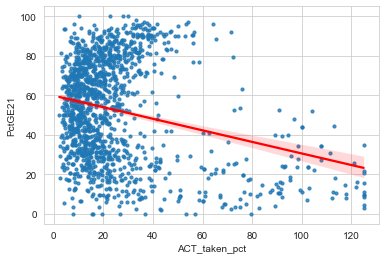

In [48]:
sns.regplot(data = act_big, x = 'ACT_taken_pct', y = 'PctGE21', 
    scatter_kws= {'s': 10}, line_kws={'color': 'red'})

<AxesSubplot:xlabel='ACT_taken_pct', ylabel='PctGE21'>

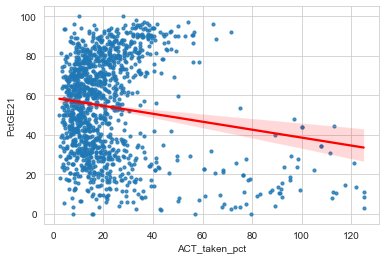

In [49]:
sns.regplot(data = act_big.query('Enroll12 >= 100'), x = 'ACT_taken_pct', y = 'PctGE21', 
    scatter_kws= {'s': 10}, line_kws={'color': 'red'})

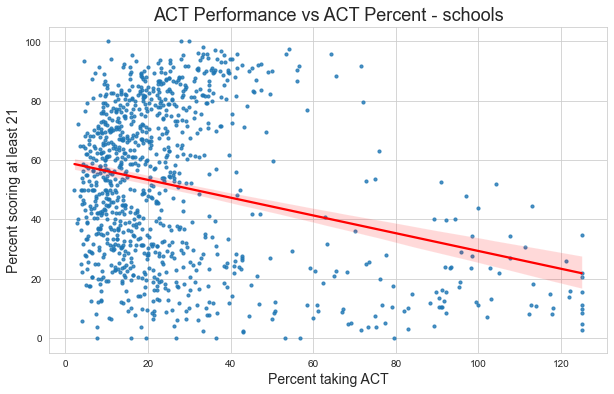

In [50]:
plt.figure(figsize=(10, 6))
sns.regplot(data = act_big.query('RType == "S"'), x = 'ACT_taken_pct', y = 'PctGE21', 
    scatter_kws= {'s': 10}, line_kws={'color': 'red'})
plt.title("ACT Performance vs ACT Percent - schools", fontsize = 18)
plt.ylabel("Percent scoring at least 21", fontsize = 14)
plt.xlabel("Percent taking ACT", fontsize = 14)
plt.show()

However, when we remove outlier schools with high testing percentages but low scores, the association disappears or becomes positive.
We replicate this in a number of plots below.

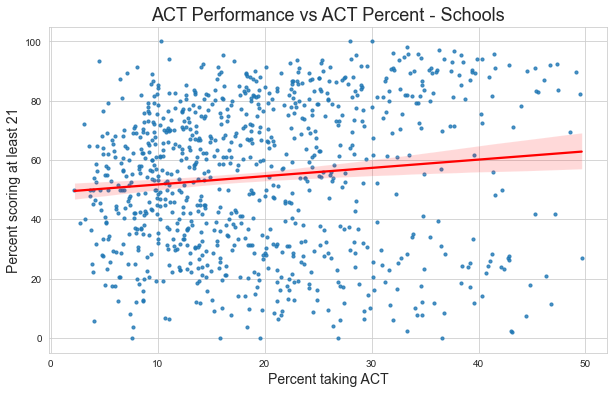

In [51]:
plt.figure(figsize=(10, 6))
sns.regplot(data = act_big.query('RType == "S" and ACT_taken_pct < 50'), 
    x = 'ACT_taken_pct', y = 'PctGE21', 
    scatter_kws= {'s': 10}, line_kws={'color': 'red'})
plt.title("ACT Performance vs ACT Percent - Schools", fontsize = 18)
plt.ylabel("Percent scoring at least 21", fontsize = 14)
plt.xlabel("Percent taking ACT", fontsize = 14)
plt.show()

<AxesSubplot:xlabel='ACT_taken_pct', ylabel='PctGE21'>

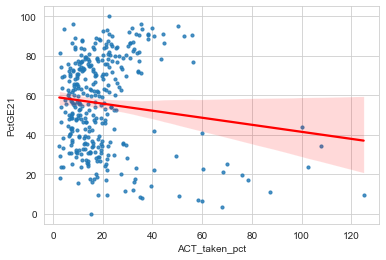

In [52]:
sns.regplot(data = act_big.query('RType == "D"'), x = 'ACT_taken_pct', y = 'PctGE21', 
    scatter_kws= {'s': 10}, line_kws={'color': 'red'})

<AxesSubplot:xlabel='ACT_taken_pct', ylabel='PctGE21'>

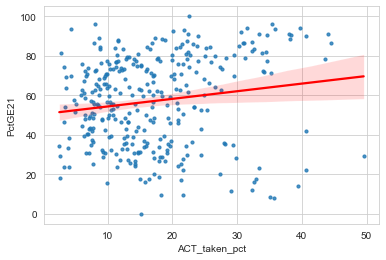

In [53]:
sns.regplot(data = act_big.query('RType == "D" and ACT_taken_pct < 50'), 
    x = 'ACT_taken_pct', y = 'PctGE21', 
    scatter_kws= {'s': 10}, line_kws={'color': 'red'})

<AxesSubplot:xlabel='ACT_taken_pct', ylabel='PctGE21'>

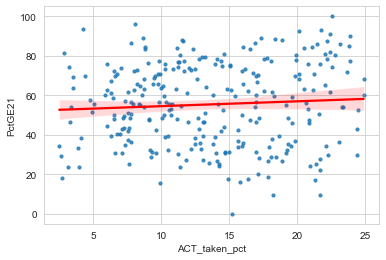

In [54]:
sns.regplot(data = act_big.query('RType == "D" and ACT_taken_pct < 25'), 
    x = 'ACT_taken_pct', y = 'PctGE21', 
    scatter_kws= {'s': 10}, line_kws={'color': 'red'})

<AxesSubplot:xlabel='ACT_taken_pct', ylabel='PctGE21'>

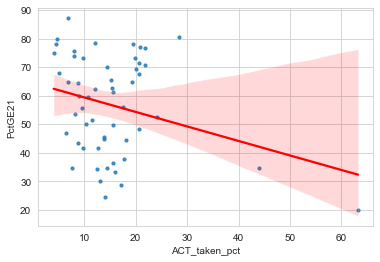

In [55]:
sns.regplot(data = act_big.query('RType == "C"'), x = 'ACT_taken_pct', y = 'PctGE21', 
    scatter_kws= {'s': 10}, line_kws={'color': 'red'})

<AxesSubplot:xlabel='ACT_taken_pct', ylabel='PctGE21'>

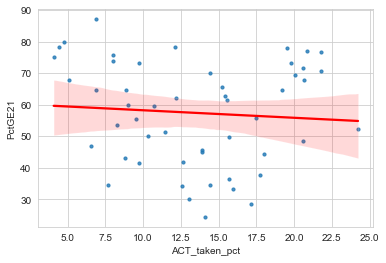

In [56]:
sns.regplot(data = act_big.query('RType == "C" and ACT_taken_pct < 25'), x = 'ACT_taken_pct', y = 'PctGE21', 
    scatter_kws= {'s': 10}, line_kws={'color': 'red'})

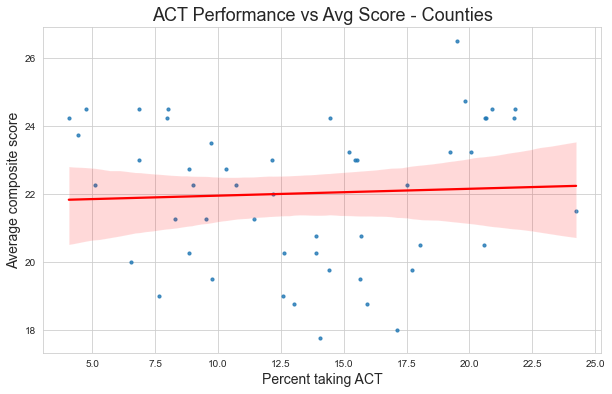

In [57]:
plt.figure(figsize=(10, 6))
sns.regplot(data = act_big.query('RType == "C" and ACT_taken_pct < 25'), 
    x = 'ACT_taken_pct', y = 'AvgScrComp', 
    scatter_kws= {'s': 10}, line_kws={'color': 'red'})
plt.title("ACT Performance vs Avg Score - Counties", fontsize = 18)
plt.ylabel("Average composite score", fontsize = 14)
plt.xlabel("Percent taking ACT", fontsize = 14)
plt.show()

#### Composite score comparisons

<AxesSubplot:xlabel='ACT_taken_pct', ylabel='AvgScrComp'>

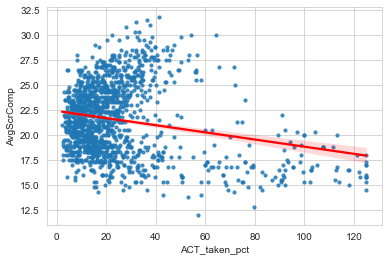

In [58]:
sns.regplot(data = act_big, x = 'ACT_taken_pct', y = 'AvgScrComp', 
    scatter_kws= {'s': 10}, line_kws={'color': 'red'})

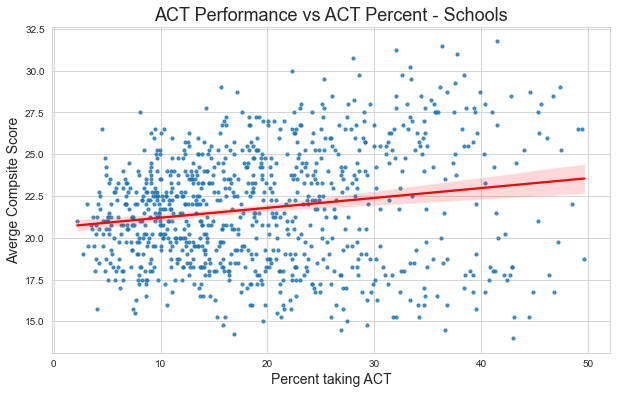

In [59]:
plt.figure(figsize=(10, 6))
sns.regplot(data = act_big.query('RType == "S" and ACT_taken_pct < 50'), 
    x = 'ACT_taken_pct', y = 'AvgScrComp', 
    scatter_kws= {'s': 10}, line_kws={'color': 'red'})
plt.title("ACT Performance vs ACT Percent - Schools", fontsize = 18)
plt.ylabel("Averge Compsite Score", fontsize = 14)
plt.xlabel("Percent taking ACT", fontsize = 14)
plt.show()

<AxesSubplot:xlabel='ACT_taken_pct', ylabel='AvgScrComp'>

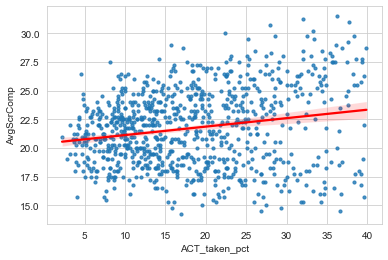

In [60]:
sns.regplot(data = act_big.query('RType == "S" and ACT_taken_pct < 40'), 
    x = 'ACT_taken_pct', y = 'AvgScrComp', 
    scatter_kws= {'s': 10}, line_kws={'color': 'red'})

## Cali SATs

We undertake a similar analysis on the SAT scores.

#### View Dataset

In [61]:
sat_raw = pd.read_csv('data/sat_2019_ca.csv')

In [62]:
sat_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CDS                    2579 non-null   float64
 1   CCode                  2579 non-null   float64
 2   CDCode                 2579 non-null   float64
 3   SCode                  2579 non-null   float64
 4   RType                  2579 non-null   object 
 5   SName                  1982 non-null   object 
 6   DName                  2521 non-null   object 
 7   CName                  2579 non-null   object 
 8   Enroll12               2579 non-null   float64
 9   NumTSTTakr12           2579 non-null   float64
 10  NumERWBenchmark12      2304 non-null   object 
 11  PctERWBenchmark12      2304 non-null   object 
 12  NumMathBenchmark12     2304 non-null   object 
 13  PctMathBenchmark12     2304 non-null   object 
 14  Enroll11               2579 non-null   float64
 15  NumT

In [63]:
sat_raw.head()

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTSTTakr12,...,NumERWBenchmark11,PctERWBenchmark11,NumMathBenchmark11,PctMathBenchmark11,TotNumBothBenchmark12,PctBothBenchmark12,TotNumBothBenchmark11,PctBothBenchmark11,Year,Unnamed: 25
0,6.616e+12,6.0,6.616e+05,6.300e+05,S,Colusa Alternative Home,Colusa Unified,Colusa,18.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
1,6.616e+12,6.0,6.616e+05,6.348e+05,S,Maxwell Sr High,Maxwell Unified,Colusa,29.0,10.0,...,*,*,*,*,*,*,*,*,2018-19,NaN
2,1.965e+13,19.0,1.965e+06,1.931e+06,S,Belmont Senior High,Los Angeles Unified,Los Angeles,206.0,102.0,...,42,24.14,12,6.90,14,13.73,11,6.32,2018-19,NaN
3,1.965e+13,19.0,1.965e+06,1.931e+06,S,Canoga Park Senior High,Los Angeles Unified,Los Angeles,227.0,113.0,...,97,35.27,37,13.45,18,15.93,35,12.73,2018-19,NaN
4,1.965e+13,19.0,1.965e+06,1.932e+06,S,Whitman Continuation,Los Angeles Unified,Los Angeles,18.0,14.0,...,*,*,*,*,*,*,*,*,2018-19,NaN


### Data Cleaning

#### Drop Unused Columns

In [64]:
sat_ca = sat_raw.drop(columns='Unnamed: 25', index = 2579)

In [65]:
sat_ca.columns

Index(['CDS', 'CCode', 'CDCode', 'SCode', 'RType', 'SName', 'DName', 'CName',
       'Enroll12', 'NumTSTTakr12', 'NumERWBenchmark12', 'PctERWBenchmark12',
       'NumMathBenchmark12', 'PctMathBenchmark12', 'Enroll11', 'NumTSTTakr11',
       'NumERWBenchmark11', 'PctERWBenchmark11', 'NumMathBenchmark11',
       'PctMathBenchmark11', 'TotNumBothBenchmark12', 'PctBothBenchmark12',
       'TotNumBothBenchmark11', 'PctBothBenchmark11', 'Year'],
      dtype='object')

In [66]:
code_cols = ['CCode', 'CDCode', 'SCode']
name_cols = ['SName', 'DName', 'CName']
subject_cols = ["NumERWBenchmark12", "PctERWBenchmark12", 
                "NumMathBenchmark12", "PctMathBenchmark12",
                "NumERWBenchmark11", "PctERWBenchmark11", 
                "NumMathBenchmark11", "PctMathBenchmark11"]
pct_cols = ["PctBothBenchmark12", "PctBothBenchmark11"]
dropped_cols = code_cols + subject_cols + pct_cols + ['Year']
sat_ca.drop(columns = dropped_cols, inplace=True)

In [67]:
sat_ca.set_index('CDS', inplace=True)

#### Drop small schools

In [68]:
sat_ca['is_small_sample'] = (sat_ca["NumTSTTakr12"] < 15) | (sat_ca["NumTSTTakr11"] < 15)
sat_ca.head()
sat_ca.groupby('is_small_sample').mean()

,Enroll12,NumTSTTakr12,Enroll11,NumTSTTakr11
is_small_sample,,,,
False,1136.414,412.578,1116.955,500.422
True,71.182,5.689,57.672,6.711


In [69]:
sat_big = sat_ca[~sat_ca['is_small_sample']].copy()

In [70]:
sat_big['RType'].value_counts()

S    1198
D     386
C      54
X       1
Name: RType, dtype: int64

#### State aggregate

In [71]:
sat_big.query("RType == 'X'").drop(columns = name_cols)

,RType,Enroll12,NumTSTTakr12,Enroll11,NumTSTTakr11,TotNumBothBenchmark12,TotNumBothBenchmark11,is_small_sample
CDS,,,,,,,,
0.0,X,489650.0,170411.0,474843.0,206642.0,77178,103915,False


#### Check data types

In [72]:
sat_big.dtypes

RType                     object
SName                     object
DName                     object
CName                     object
Enroll12                 float64
NumTSTTakr12             float64
Enroll11                 float64
NumTSTTakr11             float64
TotNumBothBenchmark12     object
TotNumBothBenchmark11     object
is_small_sample             bool
dtype: object

In [73]:
sat_big.isna().sum()

RType                      0
SName                    440
DName                     54
CName                      0
Enroll12                   0
NumTSTTakr12               0
Enroll11                   0
NumTSTTakr11               0
TotNumBothBenchmark12      0
TotNumBothBenchmark11      0
is_small_sample            0
dtype: int64

In [74]:
sat_big[['TotNumBothBenchmark12', 'TotNumBothBenchmark11']] = \
    sat_big[['TotNumBothBenchmark12', 'TotNumBothBenchmark11']].astype(int)


#### Combine 11 and 12th grade numbers
This will smooth out the data somewhat and the differences between 11th and 12th grade students probably don't vary much by school.

In [75]:
sat_big['Enroll_all'] = sat_big['Enroll11'] + sat_big['Enroll12'] 
sat_big['NumTstTakr_all'] = sat_big['NumTSTTakr11'] + sat_big['NumTSTTakr12'] 
sat_big['NumBenchmark_all'] = sat_big['TotNumBothBenchmark11'] + sat_big['TotNumBothBenchmark12'] 

In [76]:
sat_big.drop(columns = sat_ca.loc[:, 'Enroll12':'TotNumBothBenchmark11'].columns, inplace = True)

In [77]:
sat_big.drop(columns = 'is_small_sample', inplace=True)

In [78]:
sat_big.head()

,RType,SName,DName,CName,Enroll_all,NumTstTakr_all,NumBenchmark_all
CDS,,,,,,,
1.965e+13,S,Belmont Senior High,Los Angeles Unified,Los Angeles,425.0,276.0,25
1.965e+13,S,Canoga Park Senior High,Los Angeles Unified,Los Angeles,560.0,388.0,53
1.965e+13,S,Foshay Learning Center,Los Angeles Unified,Los Angeles,353.0,289.0,80
3.074e+13,S,Mission Viejo High,Saddleback Valley Unified,Orange,1065.0,413.0,304
1.965e+13,S,New Open World Academy K-12,Los Angeles Unified,Los Angeles,164.0,147.0,12


In [79]:
sat_big.query('Enroll_all < NumTstTakr_all')

,RType,SName,DName,CName,Enroll_all,NumTstTakr_all,NumBenchmark_all
CDS,,,,,,,
1.613e+12,S,American Indian Public High,Oakland Unified,Alameda,130.0,133.0,77
1.965e+13,S,Contreras Learning Center-School of Social Jus...,Los Angeles Unified,Los Angeles,190.0,196.0,16


In [80]:
sat_big['SAT_taken_pct'] = 100*sat_big['NumTstTakr_all']/sat_big['Enroll_all']
sat_big['SAT_benchmark_pct'] = 100*sat_big['NumBenchmark_all']/sat_big['NumTstTakr_all']

In [81]:
sat_big.drop(columns=['NumTstTakr_all', 'NumBenchmark_all'], inplace=True)

#### State aggregate


In [82]:
sat_big.query('RType == "X"')

,RType,SName,DName,CName,Enroll_all,SAT_taken_pct,SAT_benchmark_pct
CDS,,,,,,,
0.0,X,State of California,State of California,State of California,964493.0,39.093,48.029


Highest testing schools / counties

In [83]:
sat_top_pct_schools = sat_big.query('RType == "S"').\
    drop(columns = 'RType').\
    sort_values('SAT_taken_pct', ascending = False).head(15)

sat_top_pct_schools

,SName,DName,CName,Enroll_all,SAT_taken_pct,SAT_benchmark_pct
CDS,,,,,,
1.965e+13,Contreras Learning Center-School of Social Jus...,Los Angeles Unified,Los Angeles,190.0,103.158,8.163
1.613e+12,American Indian Public High,Oakland Unified,Alameda,130.0,102.308,57.895
3.367e+13,San Jacinto Valley Academy,San Jacinto Unified,Riverside,137.0,99.270,25.000
1.965e+13,Alliance Judy Ivie Burton Technology Academy High,Los Angeles Unified,Los Angeles,287.0,98.258,31.915
3.067e+13,Middle College High,Santa Ana Unified,Orange,168.0,98.214,59.394
1.965e+13,Alliance Gertz-Ressler Richard Merkin 6-12 Com...,Los Angeles Unified,Los Angeles,255.0,98.039,29.600
1.965e+13,Alliance Collins Family College-Ready High,Los Angeles Unified,Los Angeles,291.0,97.938,24.561
1.965e+13,Alliance Ted K. Tajima High,Los Angeles Unified,Los Angeles,170.0,97.059,27.879
1.965e+13,Alliance Dr. Olga Mohan High,Los Angeles Unified,Los Angeles,200.0,97.000,39.691


In [84]:
sat_big.query('RType == "C"').\
    drop(columns = ["SName", "DName"]).\
    sort_values('SAT_taken_pct', ascending = False).head(10)

,RType,CName,Enroll_all,SAT_taken_pct,SAT_benchmark_pct
CDS,,,,,
1.900e+13,C,Los Angeles,226512.0,51.631,36.902
4.300e+13,C,Santa Clara,42157.0,48.998,64.248
3.800e+13,C,San Francisco,8947.0,48.038,63.518
5.600e+13,C,Ventura,21674.0,46.147,45.461
3.600e+13,C,San Bernardino,62684.0,42.513,36.249
4.100e+13,C,San Mateo,14451.0,42.322,68.460
3.300e+13,C,Riverside,67444.0,41.575,37.618
2.800e+13,C,Napa,3404.0,39.160,46.437
2.100e+13,C,Marin,5288.0,39.145,75.700


In [85]:
sat_big.query('RType == "C"').\
    drop(columns = ["SName", "DName"]).\
    sort_values('SAT_benchmark_pct', ascending = False).head(10)

,RType,CName,Enroll_all,SAT_taken_pct,SAT_benchmark_pct
CDS,,,,,
9.000e+12,C,El Dorado,4427.0,29.749,80.562
2.200e+13,C,Mariposa,291.0,25.773,80.000
2.900e+13,C,Nevada,2804.0,12.696,77.528
2.100e+13,C,Marin,5288.0,39.145,75.700
3.100e+13,C,Placer,11850.0,34.650,75.524
3.000e+12,C,Amador,649.0,15.562,73.267
4.500e+13,C,Shasta,4285.0,18.273,71.903
4.000e+13,C,San Luis Obispo,5557.0,26.579,70.345
4.100e+13,C,San Mateo,14451.0,42.322,68.460


### Graphs

<AxesSubplot:xlabel='SAT_taken_pct', ylabel='SAT_benchmark_pct'>

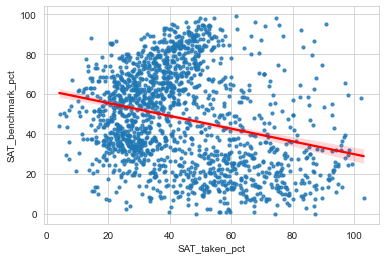

In [86]:
sns.regplot(data=sat_big, x = 'SAT_taken_pct', y = 'SAT_benchmark_pct',
    scatter_kws= {'s': 10}, line_kws={'color': 'red'}) 

<AxesSubplot:xlabel='SAT_taken_pct', ylabel='SAT_benchmark_pct'>

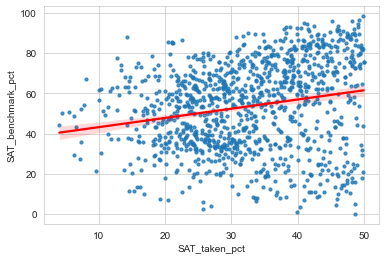

In [87]:
sns.regplot(data=sat_big.query('SAT_taken_pct < 50'), x = 'SAT_taken_pct', y = 'SAT_benchmark_pct',
    scatter_kws= {'s': 10}, line_kws={'color': 'red'}) 

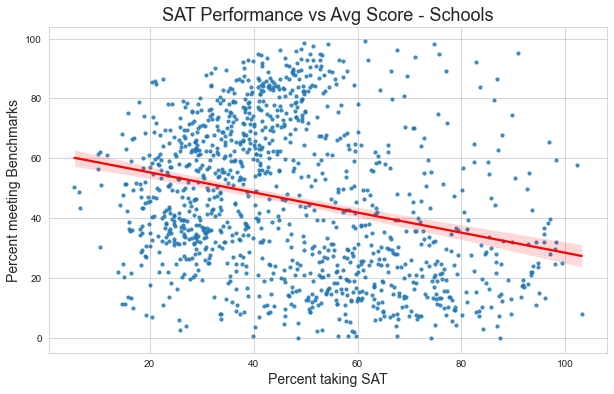

In [88]:
plt.figure(figsize=(10, 6))
sns.regplot(data=sat_big.query('RType == "S"'), 
    x = 'SAT_taken_pct', y = 'SAT_benchmark_pct',
    scatter_kws= {'s': 10}, line_kws={'color': 'red'})
plt.title("SAT Performance vs Avg Score - Schools", fontsize = 18)
plt.ylabel("Percent meeting Benchmarks", fontsize = 14)
plt.xlabel("Percent taking SAT", fontsize = 14)
plt.show() 

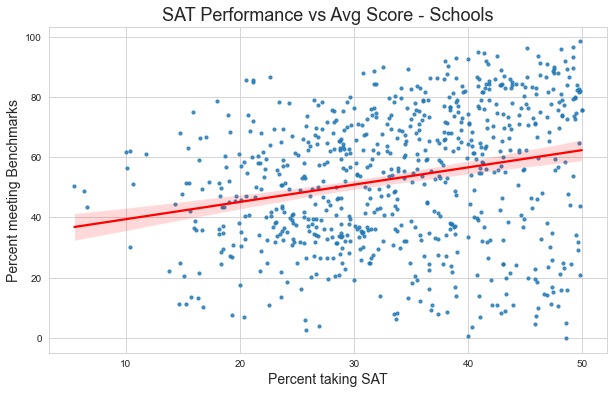

In [89]:
plt.figure(figsize=(10, 6))
sns.regplot(data=sat_big.query('RType == "S" and SAT_taken_pct < 50'), 
    x = 'SAT_taken_pct', y = 'SAT_benchmark_pct',
    scatter_kws= {'s': 10}, line_kws={'color': 'red'})
plt.title("SAT Performance vs Avg Score - Schools", fontsize = 18)
plt.ylabel("Percent meeting Benchmarks", fontsize = 14)
plt.xlabel("Percent taking SAT", fontsize = 14)
plt.show() 

<AxesSubplot:xlabel='SAT_taken_pct', ylabel='SAT_benchmark_pct'>

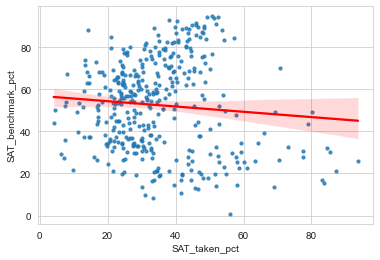

In [90]:
sns.regplot(data=sat_big.query('RType == "D"'), x = 'SAT_taken_pct', y = 'SAT_benchmark_pct',
    scatter_kws= {'s': 10}, line_kws={'color': 'red'}) 

<AxesSubplot:xlabel='SAT_taken_pct', ylabel='SAT_benchmark_pct'>

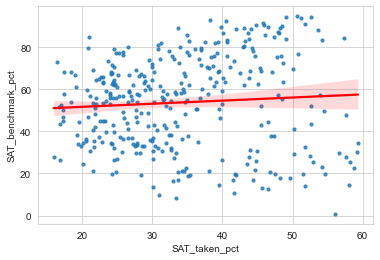

In [91]:
sns.regplot(data=sat_big.query('RType == "D" and SAT_taken_pct < 60 and SAT_taken_pct > 15'), 
    x = 'SAT_taken_pct', y = 'SAT_benchmark_pct',
    scatter_kws= {'s': 10}, line_kws={'color': 'red'}) 

<AxesSubplot:xlabel='SAT_taken_pct', ylabel='SAT_benchmark_pct'>

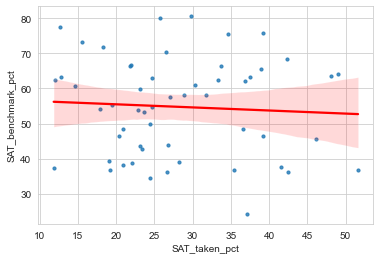

In [92]:
sns.regplot(data=sat_big.query('RType == "C"'), x = 'SAT_taken_pct', y = 'SAT_benchmark_pct',
    scatter_kws= {'s': 10}, line_kws={'color': 'red'}) 

## Comparing ACT to SAT

In [93]:
ca_all = act_big.join(sat_big.drop(columns = ["RType", "SName", "DName", "CName"]))

In [94]:
ca_all.head()

,RType,SName,DName,CName,Enroll12,NumTstTakr,NumGE21,PctGE21,ACT_taken_pct,AvgScrComp,Enroll_all,SAT_taken_pct,SAT_benchmark_pct
CDS,,,,,,,,,,,,,
4.370e+13,S,Abraham Lincoln High,San Jose Unified,Santa Clara,463,53,34,64.15,11.45,22.50,916.0,63.646,43.396
1.965e+13,S,Abraham Lincoln Senior High,Los Angeles Unified,Los Angeles,226,19,11,57.89,8.41,21.50,460.0,66.087,29.605
1.977e+13,S,Academia Avance Charter,SBE - Academia Avance Charter,Los Angeles,65,33,3,9.09,50.77,15.75,119.0,68.908,13.415
1.965e+13,S,Academies of Education and Empowerment at Cars...,Los Angeles Unified,Los Angeles,126,16,5,31.25,12.70,17.75,271.0,67.897,14.130
1.965e+13,S,Academy of the Canyons,William S. Hart Union High,Los Angeles,104,36,34,94.44,34.62,27.00,209.0,66.507,89.209


The performance on the ACT and SAT are highly correlated (0.89).
However the participation on these exams is only weakly correlated.

<AxesSubplot:>

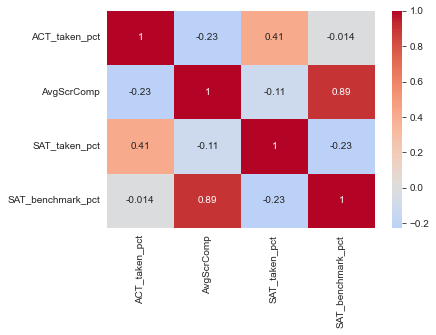

In [95]:
sns.heatmap(ca_all[['ACT_taken_pct', 'AvgScrComp', 'SAT_taken_pct', 'SAT_benchmark_pct']].corr(),
cmap = 'coolwarm', center = 0, annot = True)

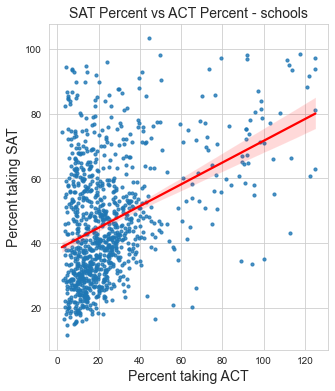

In [96]:
plt.figure(figsize=(5, 6))
sns.regplot(data = ca_all.query('RType == "S"'), 
    x = "ACT_taken_pct", y = "SAT_taken_pct", 
    scatter_kws = {'s': 10}, line_kws={'color': 'red'})

plt.title("SAT Percent vs ACT Percent - schools", fontsize = 14)
plt.ylabel("Percent taking SAT", fontsize = 14)
plt.xlabel("Percent taking ACT", fontsize = 14)

plt.show()

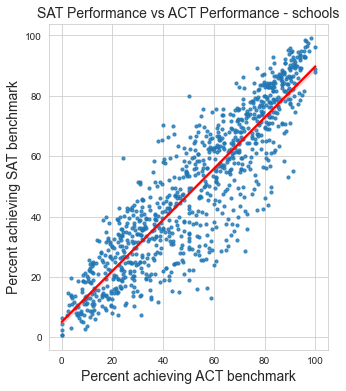

In [97]:
plt.figure(figsize=(5, 6))
sns.regplot(data = ca_all.query('RType == "S"'), 
    x = "PctGE21", y = "SAT_benchmark_pct", 
    scatter_kws = {'s': 10}, line_kws={'color': 'red'})

plt.title("SAT Performance vs ACT Performance - schools", fontsize = 14)
plt.ylabel("Percent achieving SAT benchmark", fontsize = 14)
plt.xlabel("Percent achieving ACT benchmark", fontsize = 14)

plt.show()

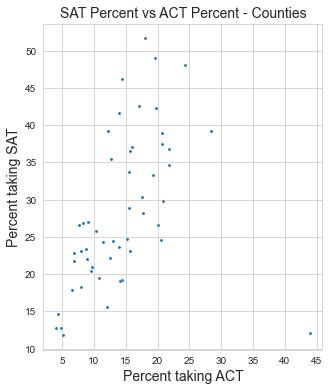

In [98]:
plt.figure(figsize=(5, 6))
sns.scatterplot(data = ca_all.query('RType == "C"'), 
    x = "ACT_taken_pct", y = "SAT_taken_pct", 
    s = 10)

plt.title("SAT Percent vs ACT Percent - Counties", fontsize = 14)
plt.ylabel("Percent taking SAT", fontsize = 14)
plt.xlabel("Percent taking ACT", fontsize = 14)

plt.show()

## Conclusion

* SAT and ACT have similar patterns
* Full school data has negative association between participation and success
* Removing schools with very high test rates reverses association
* SAT and ACT scores are correlated across schools but participation is not
